<a href="https://colab.research.google.com/github/sumanyurosha/tensorflow-specialization/blob/master/Hands-on%20ML/chapter10/Using_Functional_and_Subclassing_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow import keras
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
housing_data = fetch_california_housing()
x, y = housing_data.data, housing_data.target
print(x.shape, y.shape)

(20640, 8) (20640,)


In [3]:
x_train, x_test, y_train, y_test = train_test_split(x, y)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

print(x_train.shape, x_test.shape)

(15480, 8) (5160, 8)


In [4]:
input_ = keras.layers.Input(shape=x_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation='relu')(input_)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)

model = keras.Model(inputs=[input_], outputs=[output])

model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 30)           930         dense[0][0]                      
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_1[0][0]                    
                                                                 dense_1[0][0]         

In [5]:
model.compile(optimizer='adam',
              loss='mae')

history = model.fit(x_train, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
387/387 [==============================] - 1s 2ms/step - loss: 0.6618 - val_loss: 0.4834
Epoch 2/100
387/387 [==============================] - 0s 1ms/step - loss: 0.4585 - val_loss: 0.4559
Epoch 3/100
387/387 [==============================] - 0s 1ms/step - loss: 0.4375 - val_loss: 0.4424
Epoch 4/100
387/387 [==============================] - 0s 1ms/step - loss: 0.4281 - val_loss: 0.4246
Epoch 5/100
387/387 [==============================] - 0s 1ms/step - loss: 0.4218 - val_loss: 0.4272
Epoch 6/100
387/387 [==============================] - 0s 1ms/step - loss: 0.4150 - val_loss: 0.4118
Epoch 7/100
387/387 [==============================] - 0s 1ms/step - loss: 0.4083 - val_loss: 0.4030
Epoch 8/100
387/387 [==============================] - 0s 1ms/step - loss: 0.4030 - val_loss: 0.4053
Epoch 9/100
387/387 [==============================] - 0s 1ms/step - loss: 0.3980 - val_loss: 0.3955
Epoch 10/100
387/387 [==============================] - 0s 1ms/step - loss: 0.3919 - val_lo

In [6]:
model.evaluate(x_test, y_test)

162/162 [==============================] - 0s 782us/step - loss: 0.3400


0.3400100767612457

In [7]:
model.predict(x_test[:3])

array([[1.4513059 ],
       [0.92461073],
       [2.728356  ]], dtype=float32)

In [8]:
y_test[:3]

array([1.198, 0.654, 3.512])

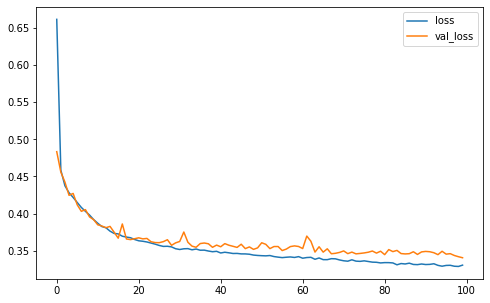

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()

In [10]:
inputA = keras.layers.Input(shape=[5])
inputB = keras.layers.Input(shape=[6])
hidden1 = keras.layers.Dense(30, activation='relu')(inputB)
hidden2 = keras.layers.Dense(10, activation='relu')(hidden1)
concat = keras.layers.Concatenate()([inputA, hidden2])
output = keras.layers.Dense(1)(concat)

model = keras.Model(inputs=[inputA, inputB], outputs=[output])

model.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 6)]          0                                            
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 30)           210         input_3[0][0]                    
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 5)]          0                                            
__________________________________________________________________________________________________
dense_4 (Dense)                 (None, 10)           310         dense_3[0][0]                    
_______________________________________________________________________________________

In [11]:
model.compile(optimizer=keras.optimizers.SGD(lr=1e-3),
              loss='mse')

model.fit((x_train[:, :5], x_train[:, 2:]), y_train, epochs=30, validation_split=0.2)

Epoch 1/30
387/387 [==============================] - 0s 1ms/step - loss: 2.0877 - val_loss: 0.9592
Epoch 2/30
387/387 [==============================] - 0s 1ms/step - loss: 0.7920 - val_loss: 0.7347
Epoch 3/30
387/387 [==============================] - 0s 1ms/step - loss: 0.6658 - val_loss: 0.6668
Epoch 4/30
387/387 [==============================] - 0s 1ms/step - loss: 0.6182 - val_loss: 0.6273
Epoch 5/30
387/387 [==============================] - 0s 1ms/step - loss: 0.5894 - val_loss: 0.5997
Epoch 6/30
387/387 [==============================] - 0s 1ms/step - loss: 0.5679 - val_loss: 0.5828
Epoch 7/30
387/387 [==============================] - 0s 1ms/step - loss: 0.5529 - val_loss: 0.5633
Epoch 8/30
387/387 [==============================] - 0s 1ms/step - loss: 0.5429 - val_loss: 0.5520
Epoch 9/30
387/387 [==============================] - 0s 1ms/step - loss: 0.5300 - val_loss: 0.5397
Epoch 10/30
387/387 [==============================] - 0s 1ms/step - loss: 0.5245 - val_loss: 0.5319

In [12]:
model.evaluate([x_test[:, :5], x_test[:, 2:]], y_test)

162/162 [==============================] - 0s 798us/step - loss: 0.4741


0.474107950925827

In [13]:
main_output = keras.layers.Dense(1, name='main_output')(concat)
aux_output = keras.layers.Dense(1, name='aux_output')(hidden2)

model = keras.Model(inputs=[inputA, inputB], outputs=[main_output, aux_output])

model.summary()

Model: "functional_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 6)]          0                                            
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 30)           210         input_3[0][0]                    
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 5)]          0                                            
__________________________________________________________________________________________________
dense_4 (Dense)                 (None, 10)           310         dense_3[0][0]                    
_______________________________________________________________________________________

In [14]:
model.compile(optimizer=keras.optimizers.SGD(lr=1e-3),
              loss=['mse', 'mse'], loss_weights=[0.9, 0.1])

model.fit((x_train[:, :5], x_train[:, 2:]), (y_train, y_train), epochs=30, validation_split=0.2)

Epoch 1/30
387/387 [==============================] - 1s 2ms/step - loss: 2.3393 - main_output_loss: 2.0731 - aux_output_loss: 4.7353 - val_loss: 1.0067 - val_main_output_loss: 0.7374 - val_aux_output_loss: 3.4299
Epoch 2/30
387/387 [==============================] - 1s 1ms/step - loss: 0.8090 - main_output_loss: 0.6164 - aux_output_loss: 2.5422 - val_loss: 0.7008 - val_main_output_loss: 0.5551 - val_aux_output_loss: 2.0117
Epoch 3/30
387/387 [==============================] - 1s 1ms/step - loss: 0.6332 - main_output_loss: 0.5138 - aux_output_loss: 1.7079 - val_loss: 0.6210 - val_main_output_loss: 0.5159 - val_aux_output_loss: 1.5667
Epoch 4/30
387/387 [==============================] - 0s 1ms/step - loss: 0.5840 - main_output_loss: 0.4896 - aux_output_loss: 1.4338 - val_loss: 0.5807 - val_main_output_loss: 0.4895 - val_aux_output_loss: 1.4016
Epoch 5/30
387/387 [==============================] - 0s 1ms/step - loss: 0.5645 - main_output_loss: 0.4813 - aux_output_loss: 1.3129 - val_loss

In [15]:
model.save('my_keras_model.h5')

In [16]:
loaded_model = keras.models.load_model('my_keras_model.h5')

loaded_model.predict((x_test[:3, :5], x_test[:3, 2:]))

[array([[2.031191 ],
        [1.1077117],
        [2.8688133]], dtype=float32), array([[2.1748471],
        [1.516974 ],
        [2.4558125]], dtype=float32)]

# **Subclassing API**

In [30]:
class WideAndDeepModel(keras.Model):
    def __init__(self, units=30, activation='relu', **kwargs):
        super().__init__(**kwargs) # for arguements like name
        self.hidden1 = keras.layers.Dense(units, activation)
        self.hidden2 = keras.layers.Dense(units, activation)
        self.main_output = keras.layers.Dense(1, name='main_output')
        self.aux_output = keras.layers.Dense(1, name='aux_output')

    def call(self, inputs):
        inputA, inputB = inputs
        hidden1 = self.hidden1(inputA)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.Concatenate()([hidden2, inputB])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)

        return main_output, aux_output


model = WideAndDeepModel()

In [31]:
model.compile(optimizer=keras.optimizers.SGD(lr=1e-3),
              loss=['mse', 'mse'], loss_weights=[0.9, 0.1])

model.fit((x_train[:, :5], x_train[:, 2:]), (y_train, y_train), epochs=30, validation_split=0.2)

Epoch 1/30
387/387 [==============================] - 1s 2ms/step - loss: 2.0556 - output_1_loss: 1.8080 - output_2_loss: 4.2839 - val_loss: 1.1458 - val_output_1_loss: 0.9271 - val_output_2_loss: 3.1136
Epoch 2/30
387/387 [==============================] - 0s 1ms/step - loss: 0.9651 - output_1_loss: 0.8088 - output_2_loss: 2.3716 - val_loss: 0.9171 - val_output_1_loss: 0.8103 - val_output_2_loss: 1.8781
Epoch 3/30
387/387 [==============================] - 0s 1ms/step - loss: 0.8189 - output_1_loss: 0.7420 - output_2_loss: 1.5112 - val_loss: 0.8077 - val_output_1_loss: 0.7527 - val_output_2_loss: 1.3026
Epoch 4/30
387/387 [==============================] - 0s 1ms/step - loss: 0.7380 - output_1_loss: 0.6967 - output_2_loss: 1.1103 - val_loss: 0.7406 - val_output_1_loss: 0.7093 - val_output_2_loss: 1.0229
Epoch 5/30
387/387 [==============================] - 1s 1ms/step - loss: 0.6874 - output_1_loss: 0.6619 - output_2_loss: 0.9168 - val_loss: 0.6947 - val_output_1_loss: 0.6731 - val_ou